___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [8]:
df = pd.read_csv("KNN_Project_Data")

**Check the head of the dataframe.**

In [9]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

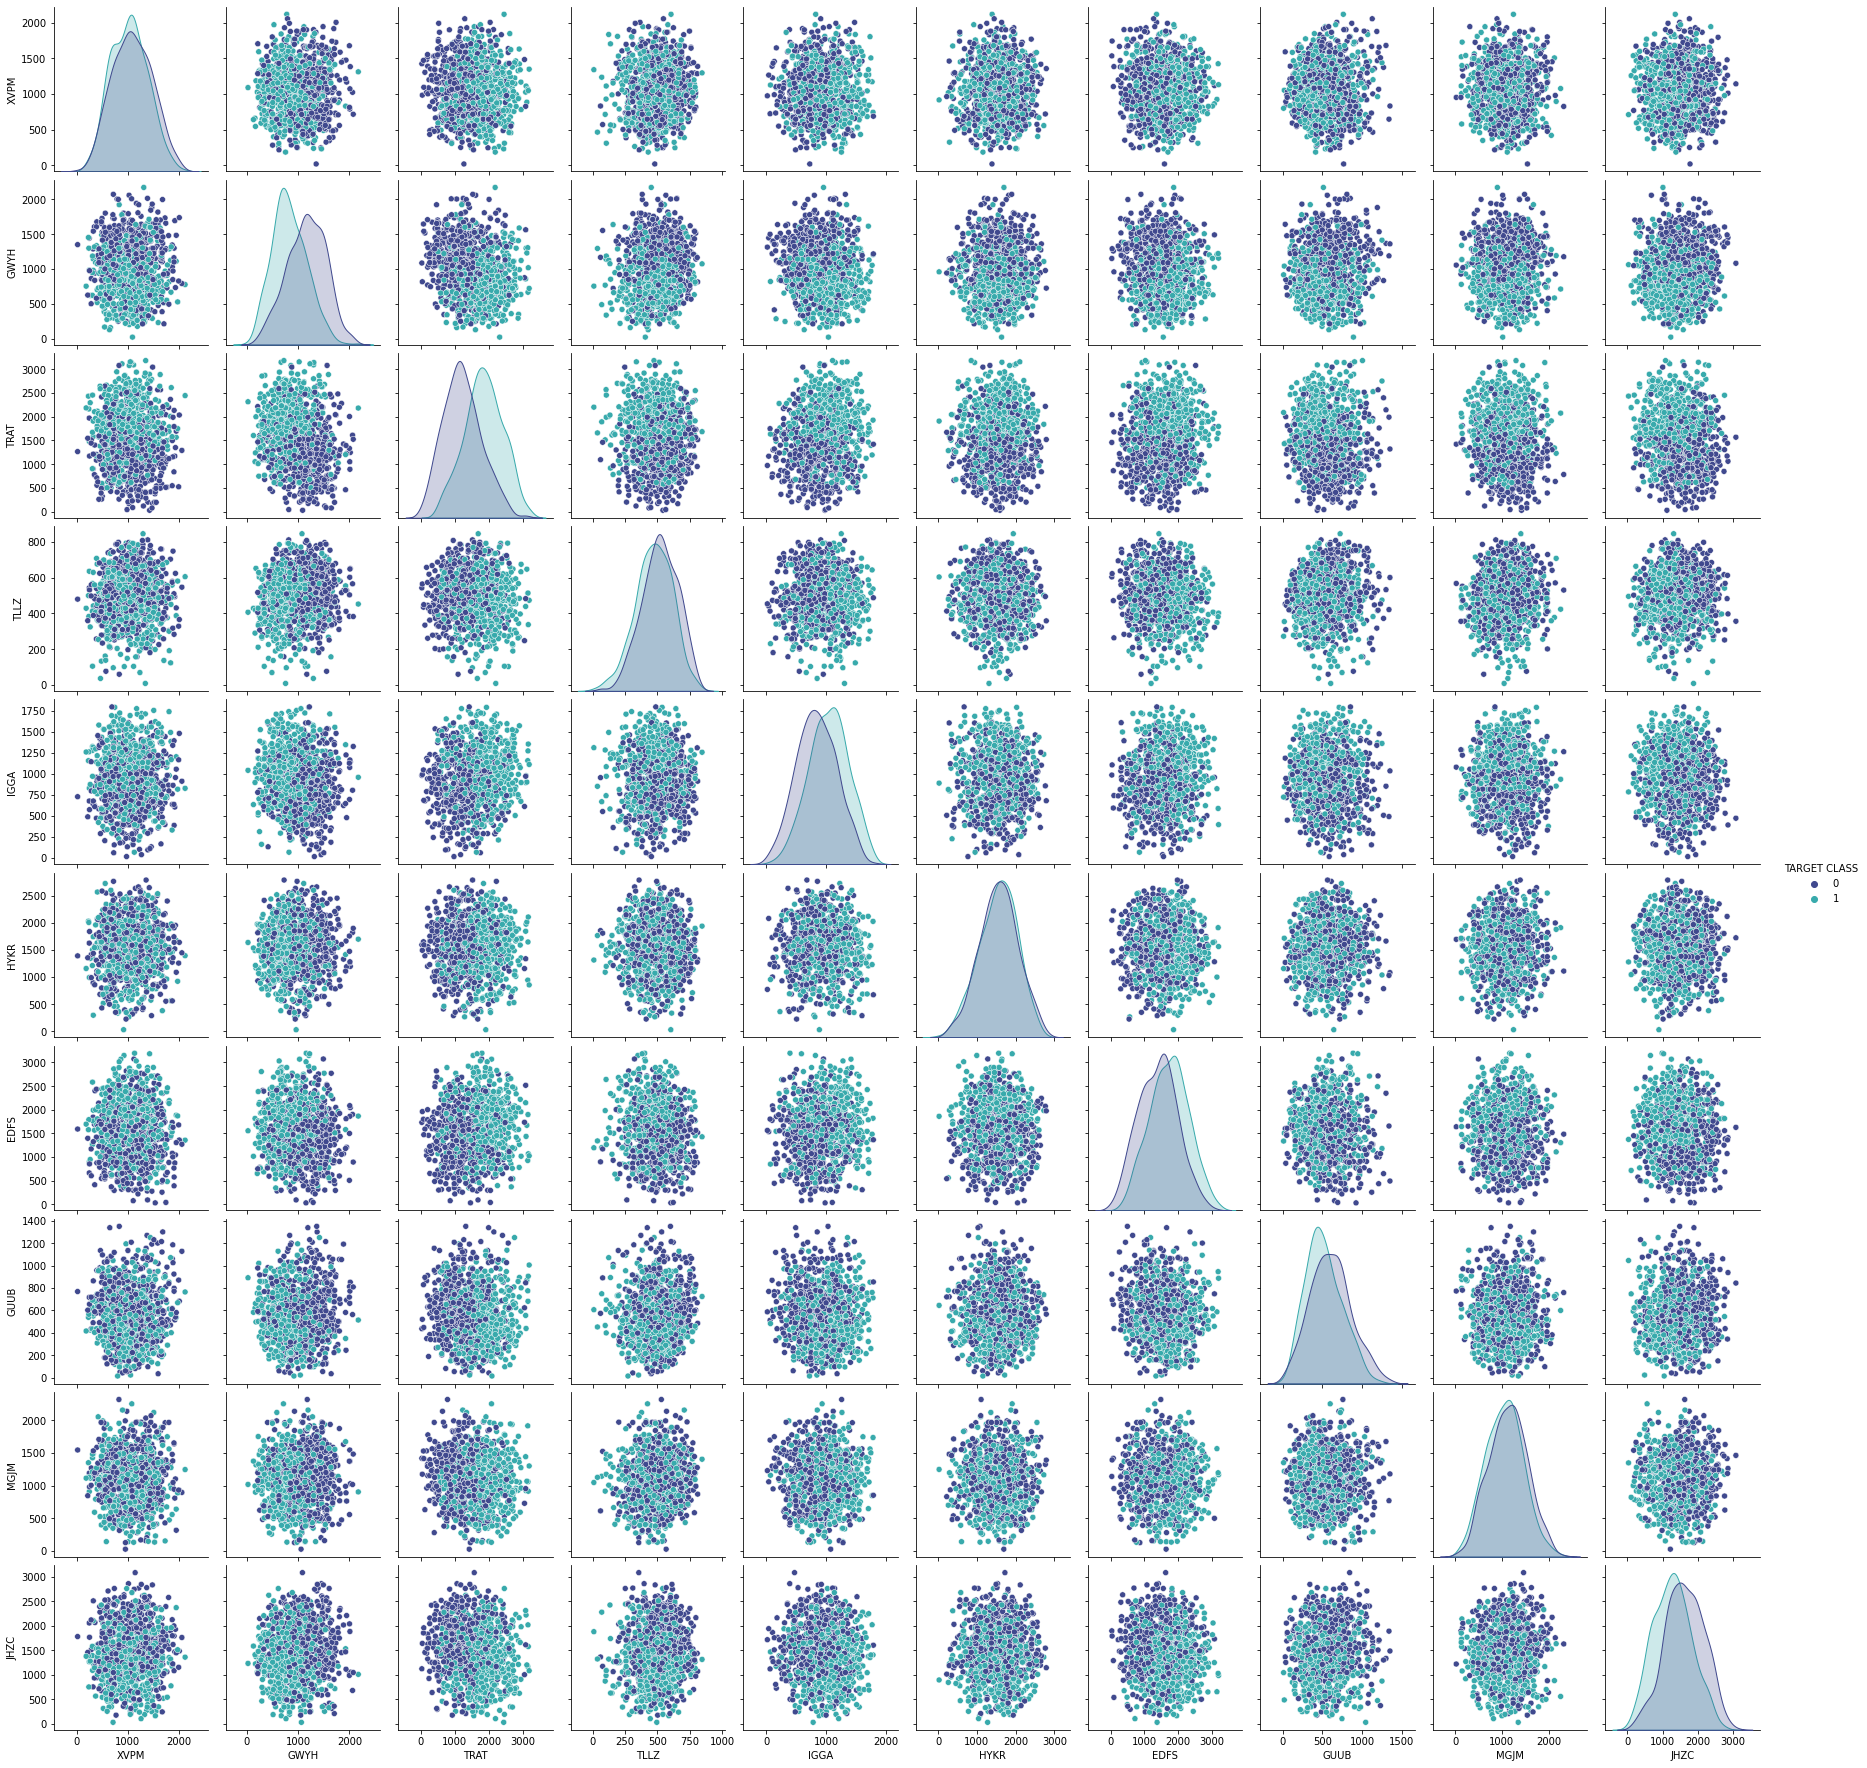

In [10]:
sns.pairplot(df, hue="TARGET CLASS", palette="mako")

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

** Create a StandardScaler() object called scaler.**

In [11]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [12]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_vals = scaler.transform(df.drop("TARGET CLASS", axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [14]:
scaled_df = pd.DataFrame(scaled_vals, columns=df.columns[:-1])
scaled_df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df["TARGET CLASS"], test_size=0.3, random_state=10)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

**Create a KNN model instance with n_neighbors=1**

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [18]:
predicted_vals = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [19]:
print(confusion_matrix(y_test, predicted_vals))

[[106  57]
 [ 35 102]]


In [20]:
print(classification_report(y_test, predicted_vals))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       163
           1       0.64      0.74      0.69       137

    accuracy                           0.69       300
   macro avg       0.70      0.70      0.69       300
weighted avg       0.70      0.69      0.69       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [21]:
errors = []

for i in range(1, 41):

  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)

  errors.append(np.mean(pred != y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'K Value vs Error Rate')

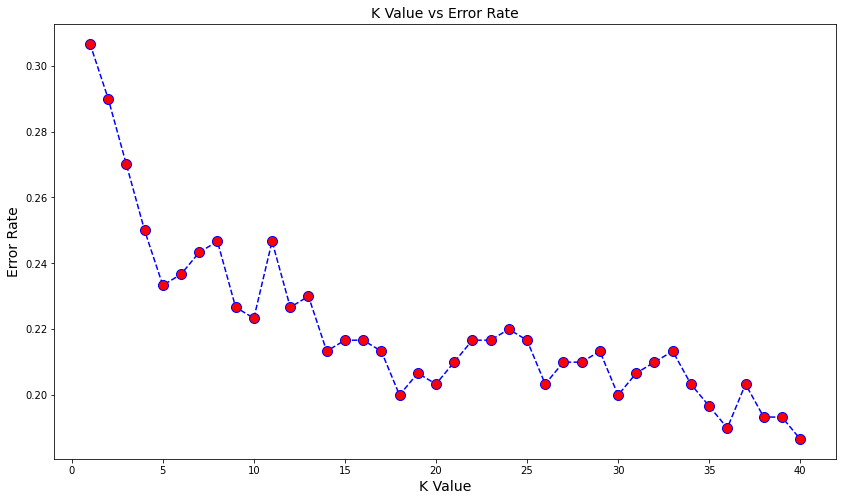

In [22]:
plt.figure(figsize=(14,8))

plt.plot(range(1,41), errors, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.xlabel("K Value", fontsize=14)
plt.ylabel("Error Rate", fontsize=14)
plt.title("K Value vs Error Rate", fontsize=14)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [27]:
# Let's proceed with k = 40 (the k value corresponding to the lowest error rate
new_knn = KNeighborsClassifier(n_neighbors=40)
new_knn.fit(X_train, y_train)
new_pred = new_knn.predict(X_test)

In [24]:
print(confusion_matrix(y_test, new_pred))

[[127  36]
 [ 20 117]]


In [25]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       163
           1       0.76      0.85      0.81       137

    accuracy                           0.81       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.82      0.81      0.81       300



In [28]:
# Notes on K Nearest Neighbours (KNN):

# KNN is a supervised machine learning algorithm that can be used for both regression, and data classification.
# Essentially, for each point in the testing data, it calculates the distance between this point and the other points
# currently present in the training dataset, and then looks at the k nearest neighbours (the k shortest distances).
# Then, these neighbouring points are split by class/category, and the test point is labelled with the majority class
# from this pool.